In [77]:
import pandas as pd
import random
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [78]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [79]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [80]:
#out_pressure값이 하나로 고정되어있음
train.drop("out_pressure", axis = 1, inplace = True)
test.drop("out_pressure", axis = 1, inplace = True)

# EDA 분석

In [81]:
train.head()

,air_inflow,air_end_temp,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,24.65,2017.0,62.41,3.12,0


In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   air_inflow     2463 non-null   float64
 1   air_end_temp   2463 non-null   float64
 2   motor_current  2463 non-null   float64
 3   motor_rpm      2463 non-null   float64
 4   motor_temp     2463 non-null   float64
 5   motor_vibe     2463 non-null   float64
 6   type           2463 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 134.8 KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7389 entries, 0 to 7388
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   air_inflow     7389 non-null   float64
 1   air_end_temp   7389 non-null   float64
 2   out_pressure   7389 non-null   float64
 3   motor_current  7389 non-null   float64
 4   motor_rpm      7389 non-null   float64
 5   motor_temp     7389 non-null   float64
 6   motor_vibe     7389 non-null   float64
 7   type           7389 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 461.9 KB


In [83]:
train.describe()

,air_inflow,air_end_temp,motor_current,motor_rpm,motor_temp,motor_vibe,type
count,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000
mean,2.128843,49.001137,27.490715,2372.576939,65.766707,3.452972,2.957369
std,1.202328,8.725091,13.604597,687.870774,7.797152,1.576386,2.230113
min,0.330000,32.030000,5.340000,1201.000000,50.360000,1.970000,0.000000
25%,1.280000,41.600000,17.110000,1784.500000,59.150000,2.880000,1.000000
50%,1.960000,48.980000,25.850000,2358.000000,65.640000,3.260000,3.000000
75%,2.820000,56.355000,36.000000,2971.000000,72.275000,3.730000,5.000000
max,6.220000,64.960000,72.000000,3564.000000,80.520000,21.870000,7.000000


In [85]:
test.describe()

,air_inflow,air_end_temp,motor_current,motor_rpm,motor_temp,motor_vibe,type
count,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000
mean,2.103129,49.042735,27.417935,2373.820003,65.771623,3.345523,2.957369
std,1.163998,8.686208,13.234089,687.737182,7.741473,0.644199,2.229811
min,0.340000,32.080000,5.370000,1200.000000,50.420000,1.970000,0.000000
25%,1.280000,41.510000,17.200000,1774.000000,59.110000,2.890000,1.000000
50%,1.940000,48.760000,26.170000,2355.000000,65.520000,3.260000,3.000000
75%,2.770000,56.580000,35.860000,2972.000000,72.440000,3.730000,5.000000
max,6.240000,65.540000,74.000000,3564.000000,82.390000,6.260000,7.000000


In [86]:
type_num = len(train['type'].unique())

In [87]:
for i in range(type_num):
  print(f"type : {i}")
  print(f"train : {len(train.loc[train['type'] == i])}")
  print(f"test : {len(test.loc[test['type'] == i])}", end = "\n\n")

type : 0
train : 432
test : 1296

type : 1
train : 369
test : 1107

type : 2
train : 366
test : 1098

type : 3
train : 306
test : 918

type : 4
train : 306
test : 918

type : 5
train : 249
test : 747

type : 6
train : 249
test : 747

type : 7
train : 186
test : 558



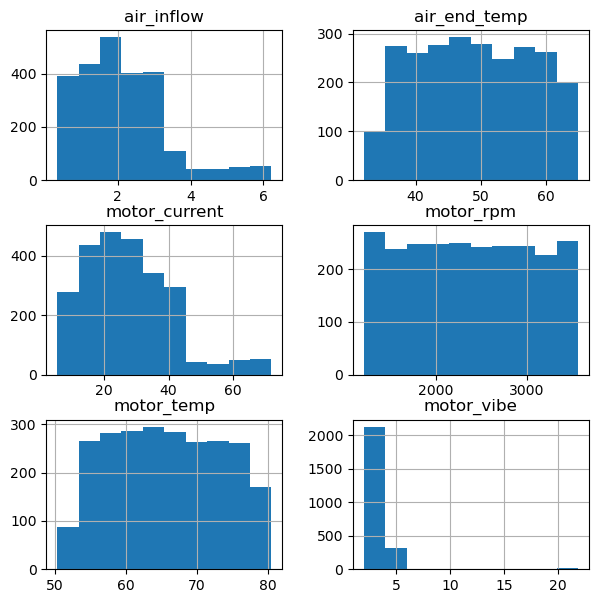

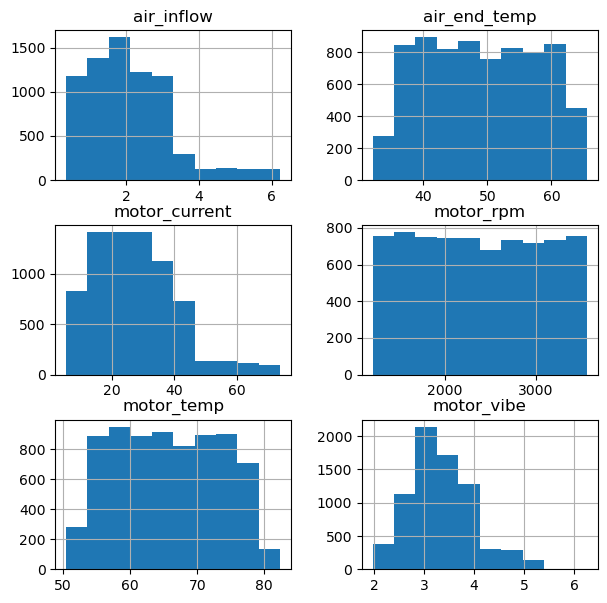

In [88]:
train.drop(["type"], axis = 1).hist(figsize = (7, 7))
test.drop(["type"], axis = 1).hist(figsize = (7, 7))
plt.show()

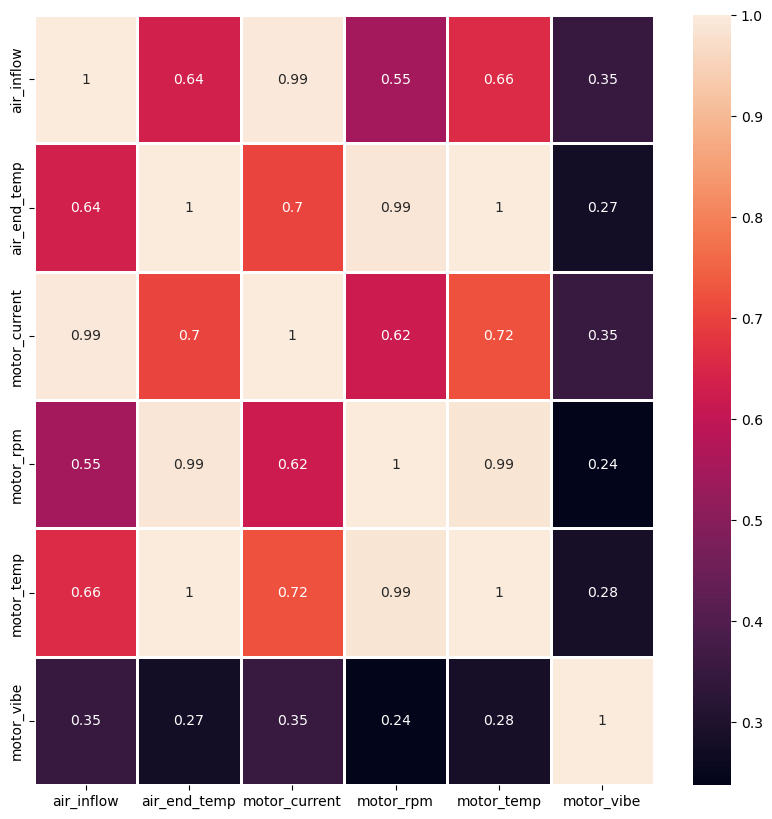

In [89]:
plt.figure(figsize = (10, 10))
sns.heatmap(train.drop("type", axis = 1).corr(), annot = True, linewidth = 1)
plt.show()

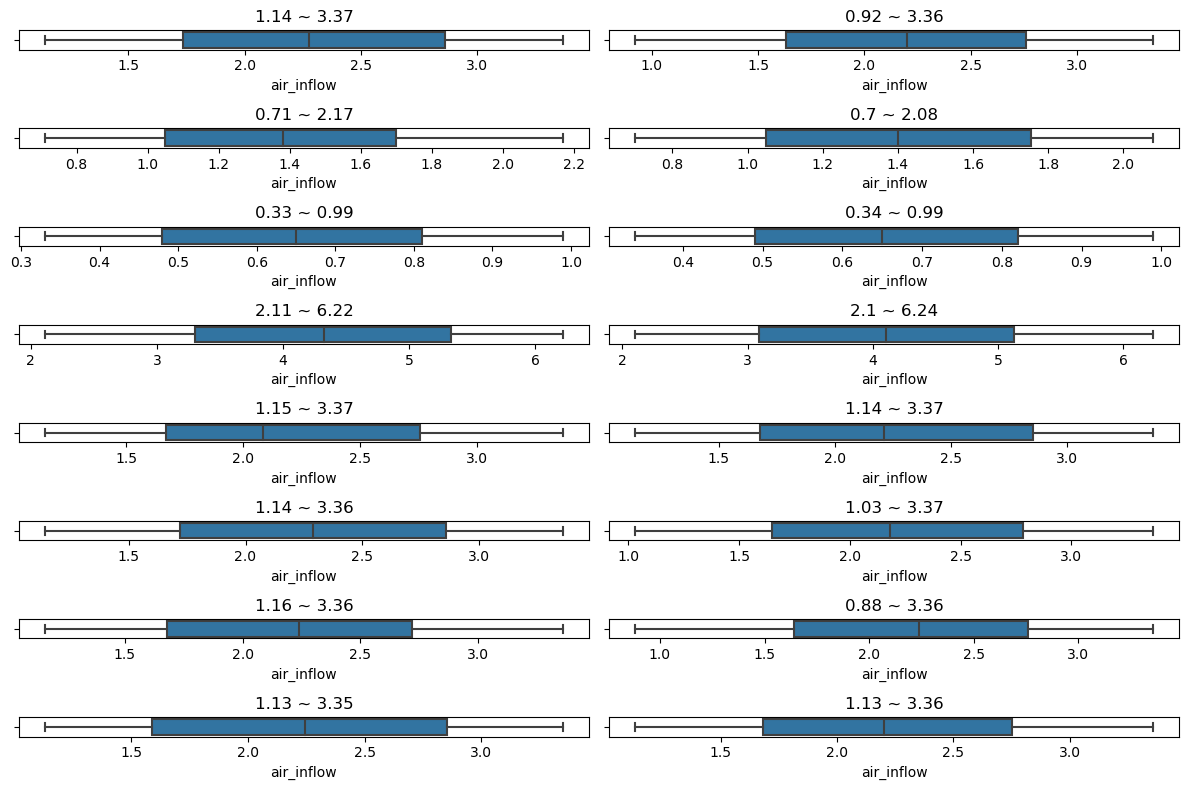

In [90]:
#air_inflow
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 8))
for i in range(8):
    plt.subplot(8, 2, 2 * i + 1)
    sns.boxplot(x = train.loc[train["type"] == i, "air_inflow"])
    plt.title("{} ~ {}".format(train.loc[train["type"] == i, "air_inflow"].min(), train.loc[train["type"] == i, "air_inflow"].max()))
    
    plt.subplot(8, 2, 2 * i + 2)
    sns.boxplot(x = test.loc[test["type"] == i, "air_inflow"])
    plt.title("{} ~ {}".format(test.loc[test["type"] == i, "air_inflow"].min(), test.loc[test["type"] == i, "air_inflow"].max()))

plt.tight_layout()
plt.show()

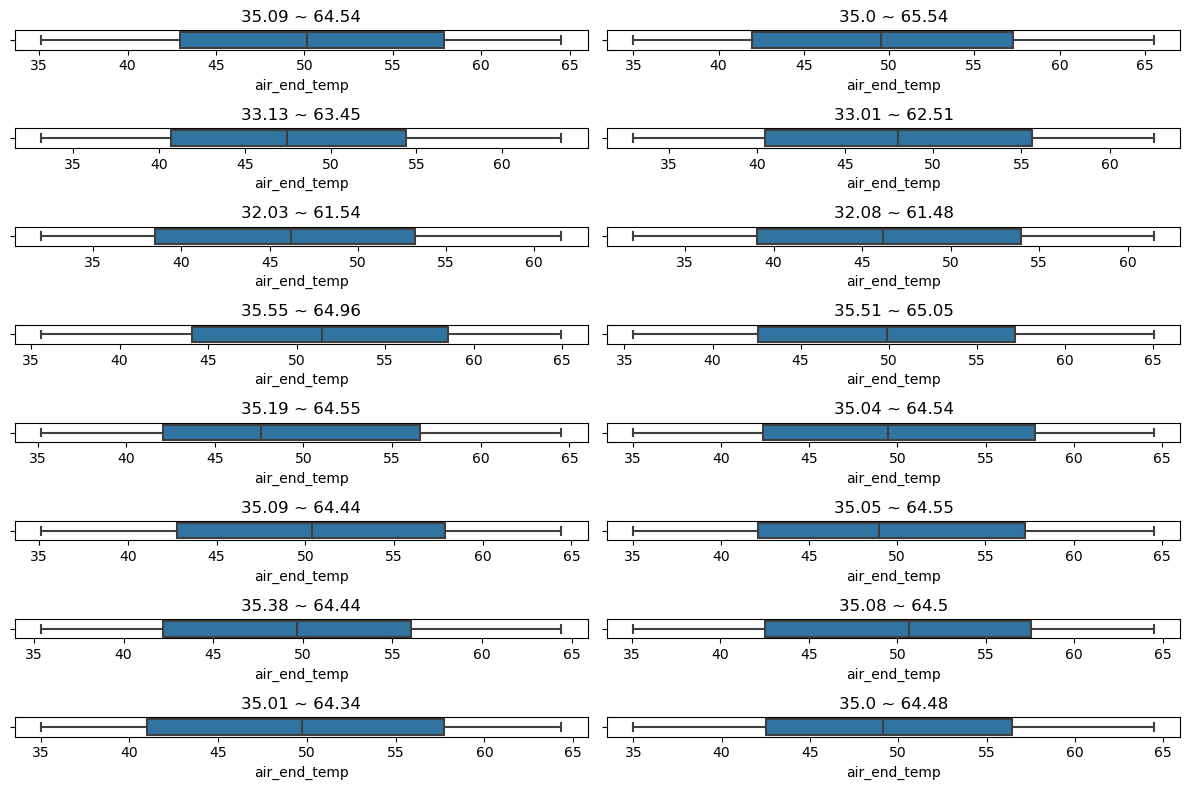

In [91]:
#air_end_temp
plt.figure(figsize = (12, 8))
for i in range(8):
    plt.subplot(8, 2, 2 * i + 1)
    sns.boxplot(x = train.loc[train["type"] == i, "air_end_temp"])
    plt.title("{} ~ {}".format(train.loc[train["type"] == i, "air_end_temp"].min(), train.loc[train["type"] == i, "air_end_temp"].max()))
    
    plt.subplot(8, 2, 2 * i + 2)
    sns.boxplot(x = test.loc[test["type"] == i, "air_end_temp"])
    plt.title("{} ~ {}".format(test.loc[test["type"] == i, "air_end_temp"].min(), test.loc[test["type"] == i, "air_end_temp"].max()))

plt.tight_layout()
plt.show()

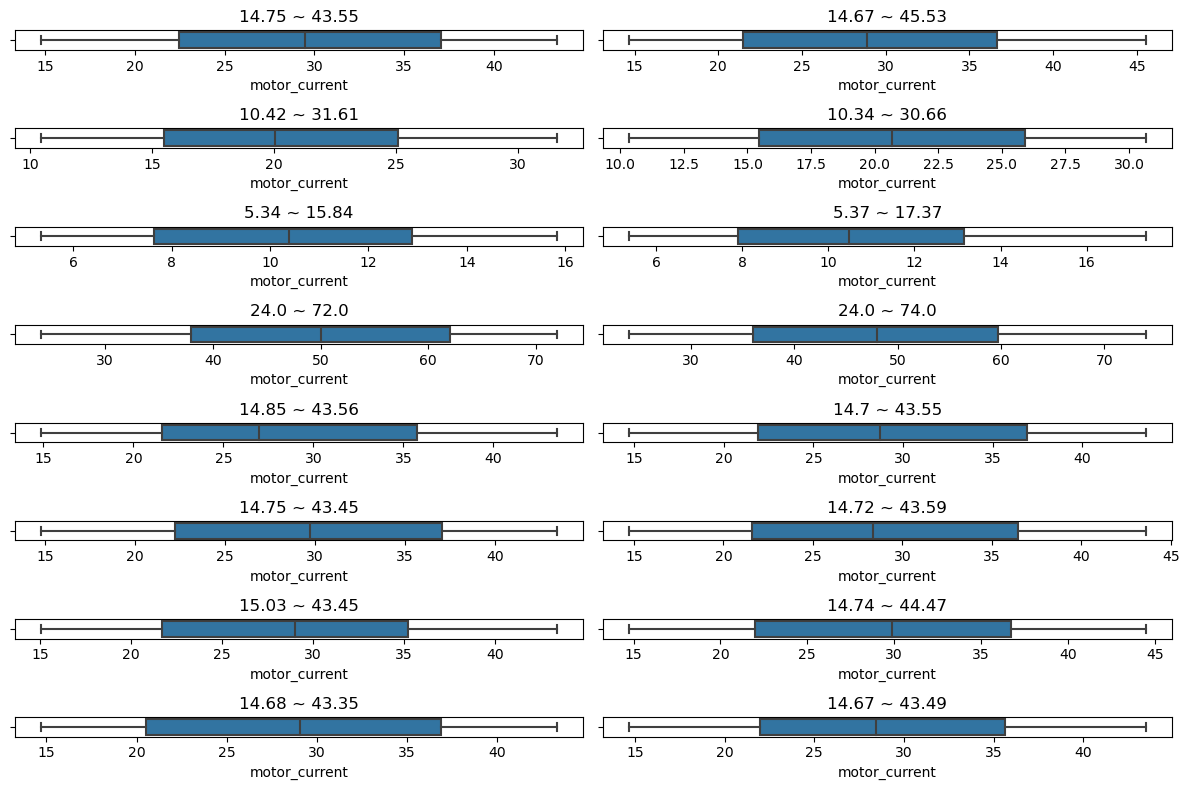

In [92]:
#motor_current
plt.figure(figsize = (12, 8))
for i in range(8):
    plt.subplot(8, 2, 2 * i + 1)
    sns.boxplot(x = train.loc[train["type"] == i, "motor_current"])
    plt.title("{} ~ {}".format(train.loc[train["type"] == i, "motor_current"].min(), train.loc[train["type"] == i, "motor_current"].max()))
    
    plt.subplot(8, 2, 2 * i + 2)
    sns.boxplot(x = test.loc[test["type"] == i, "motor_current"])
    plt.title("{} ~ {}".format(test.loc[test["type"] == i, "motor_current"].min(), test.loc[test["type"] == i, "motor_current"].max()))

plt.tight_layout()
plt.show()

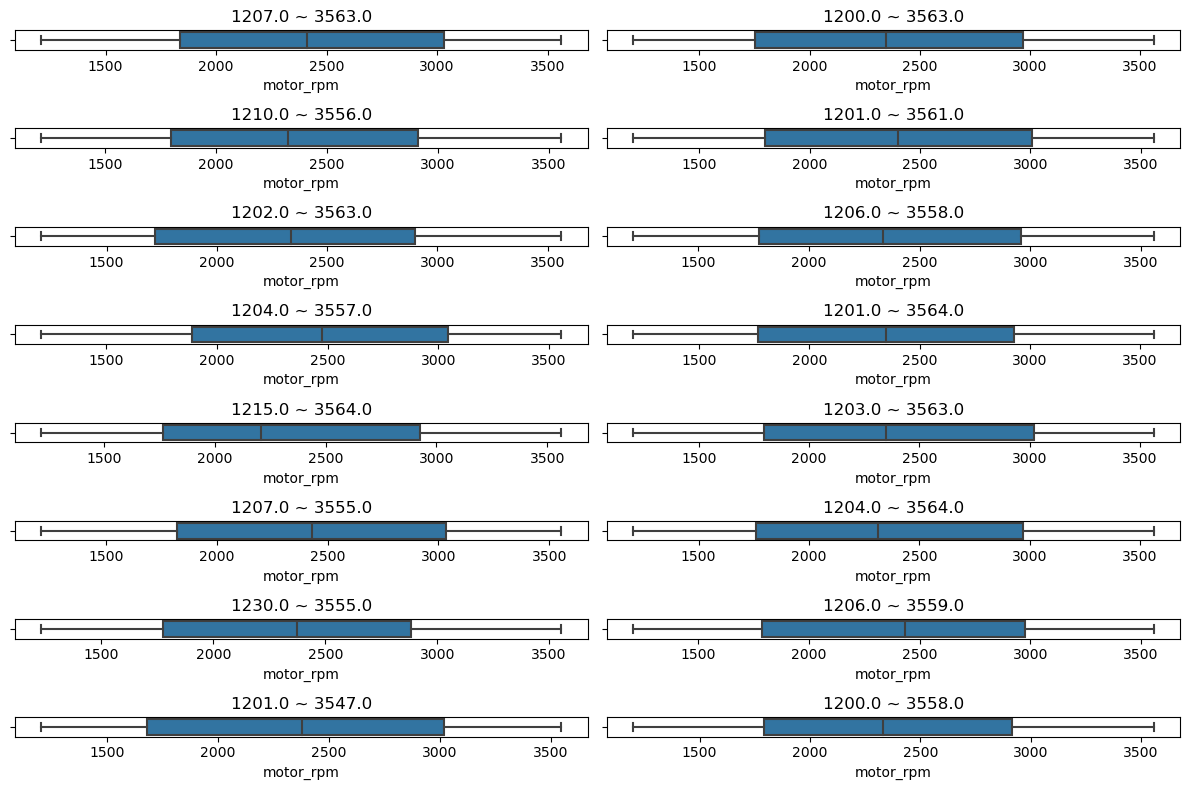

In [93]:
#motor_rpm
plt.figure(figsize = (12, 8))
for i in range(8):
    plt.subplot(8, 2, 2 * i + 1)
    sns.boxplot(x = train.loc[train["type"] == i, "motor_rpm"])
    plt.title("{} ~ {}".format(train.loc[train["type"] == i, "motor_rpm"].min(), train.loc[train["type"] == i, "motor_rpm"].max()))
    
    plt.subplot(8, 2, 2 * i + 2)
    sns.boxplot(x = test.loc[test["type"] == i, "motor_rpm"])
    plt.title("{} ~ {}".format(test.loc[test["type"] == i, "motor_rpm"].min(), test.loc[test["type"] == i, "motor_rpm"].max()))

plt.tight_layout()
plt.show()

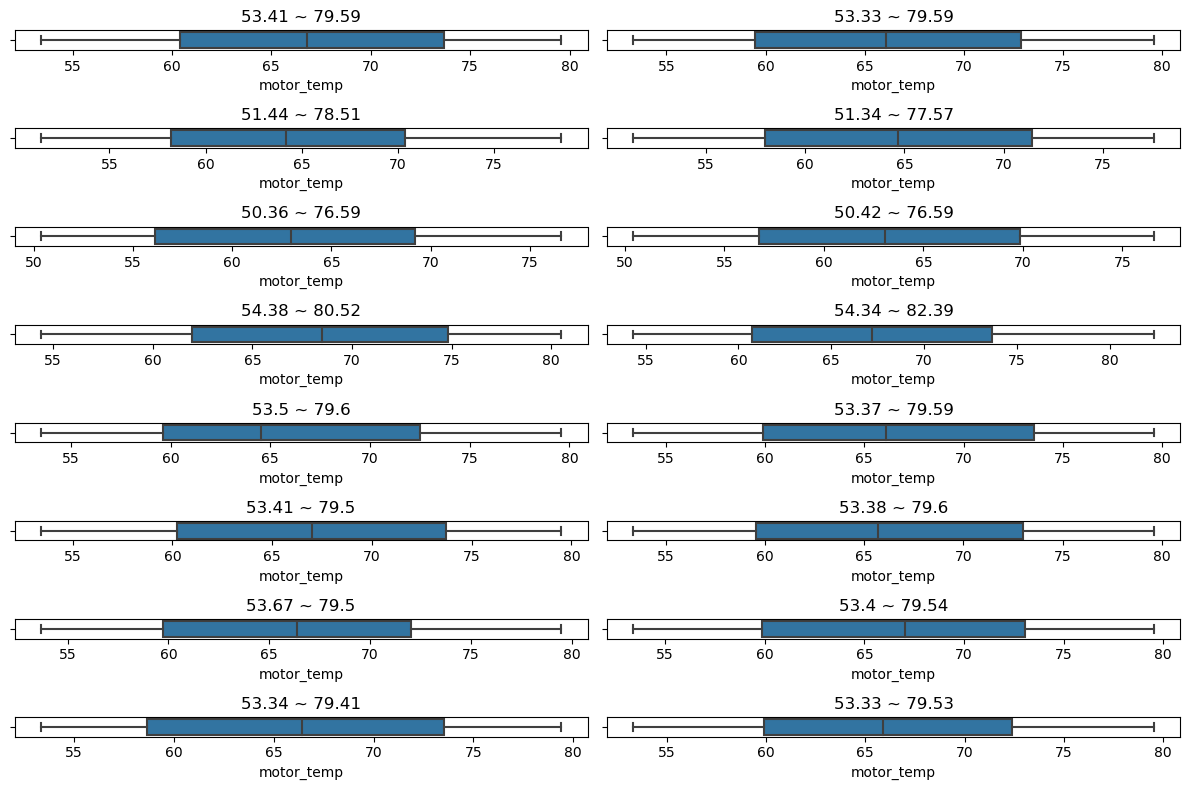

In [94]:
#motor_temp
plt.figure(figsize = (12, 8))
for i in range(8):
    plt.subplot(8, 2, 2 * i + 1)
    sns.boxplot(x = train.loc[train["type"] == i, "motor_temp"])
    plt.title("{} ~ {}".format(train.loc[train["type"] == i, "motor_temp"].min(), train.loc[train["type"] == i, "motor_temp"].max()))
    
    plt.subplot(8, 2, 2 * i + 2)
    sns.boxplot(x = test.loc[test["type"] == i, "motor_temp"])
    plt.title("{} ~ {}".format(test.loc[test["type"] == i, "motor_temp"].min(), test.loc[test["type"] == i, "motor_temp"].max()))

plt.tight_layout()
plt.show()

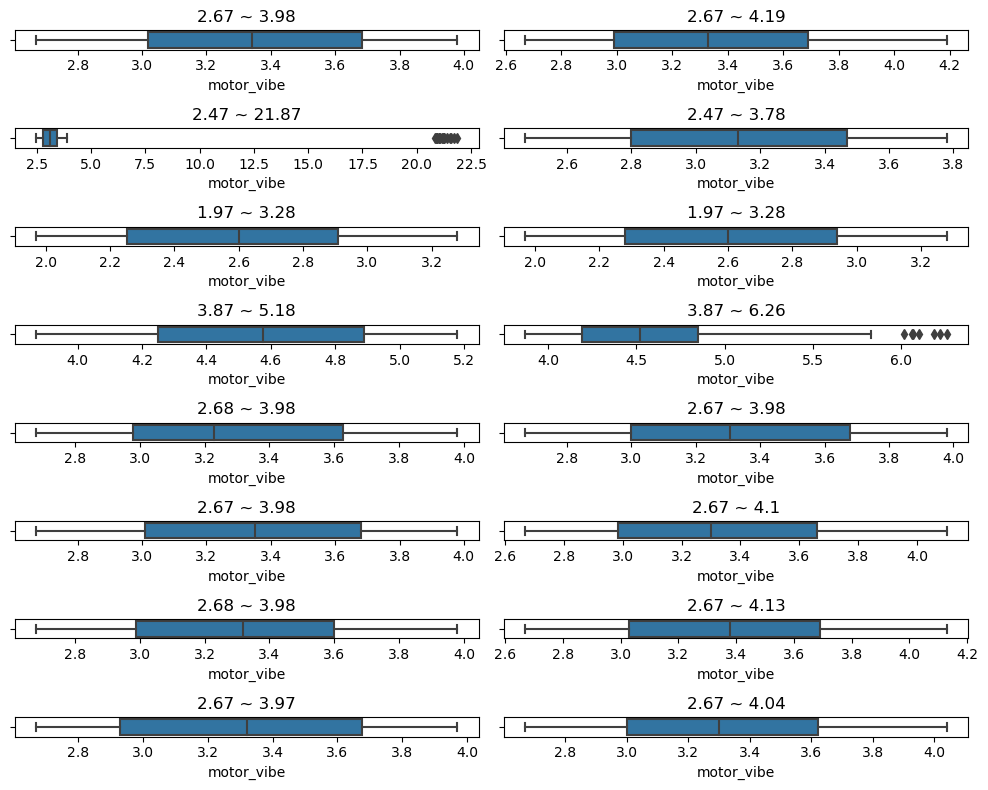

In [95]:
#motor_vibe
plt.figure(figsize = (10, 8))
for i in range(8):
    plt.subplot(8, 2, 2 * i + 1)
    sns.boxplot(x = train.loc[train["type"] == i, "motor_vibe"])
    plt.title("{} ~ {}".format(train.loc[train["type"] == i, "motor_vibe"].min(), train.loc[train["type"] == i, "motor_vibe"].max()))
    
    plt.subplot(8, 2, 2 * i + 2)
    sns.boxplot(x = test.loc[test["type"] == i, "motor_vibe"])
    plt.title("{} ~ {}".format(test.loc[test["type"] == i, "motor_vibe"].min(), test.loc[test["type"] == i, "motor_vibe"].max()))

plt.tight_layout()
plt.show()

# 특성 선택 및 정규화

In [98]:
# from sklearn.svm import OneClassSVM

# # 특성 선택
# train_features = train[['air_inflow', 'air_end_temp', 'motor_current', 'motor_rpm', 'motor_temp', 'motor_vibe']]
# test_features = test[['air_inflow', 'air_end_temp', 'motor_current', 'motor_rpm', 'motor_temp', 'motor_vibe']]

# # 정규화
# scaler = StandardScaler()
# train_features_scaled = scaler.fit_transform(train_features)
# test_features_scaled = scaler.transform(test_features)

# # OCSVM 모델 학습
# model = OneClassSVM(kernel='rbf', nu=0.1, gamma=0.1)
# model.fit(train_features_scaled)

# # 테스트 데이터에서 이상치 탐지
# predictions = model.predict(test_features_scaled)

In [ ]:
# 군집화(clustering) - K-Means

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 특성 선택
train_features = train[['air_inflow', 'air_end_temp', 'motor_current', 'motor_rpm', 'motor_temp', 'motor_vibe']]
test_features = test[['air_inflow', 'air_end_temp', 'motor_current', 'motor_rpm', 'motor_temp', 'motor_vibe']]

# 정규화
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# 예측

In [119]:
sub = pd.DataFrame()

In [120]:
# -1은 이상치, 1은 정상 데이터로 레이블링
labels = [0 if prediction == 1 else 1 for prediction in predictions]

# 테스트 데이터에 열 추가
sub['type'] = test['type']
sub['label'] = labels
# sub.apply(test['type'])

In [121]:
sub

,type,label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
7384,7,0
7385,7,0
7386,7,0
7387,7,0


# 저장

In [123]:
sub['label'].value_counts()

0    6661
1     728
Name: label, dtype: int64

In [ ]:
sub.to_csv("0408_1.csv", index = False)